In [1]:
import matplotlib.pyplot as plt
from img_driver import Img_Driver
from datetime import datetime
import numpy as np
import random
import time
import sys
import os

# 16px - Grayscale

## Neural

In [2]:
driver = Img_Driver()

X = driver.pixels_rgb(16, rgb=False, divider=255)
Y = driver.define_y(16, rgb=False)

X_test = driver.pixels_rgb(16, rgb=False, divider=255, test=True)
Y_test = driver.define_y(16, rgb=False, test=True)

random.seed(0)
random.shuffle(X)
random.seed(0)
random.shuffle(Y)

print(f"X : {len(X)} {len(X[0])}")
print(X[0:1])
print()
print(f"Y : {len(Y)}")
print(Y[0:10])
print()

print(f"X_test : {len(X_test)} {len(X_test[0])}")
print(X_test[0:1])
print()
print(f"Y_test : {len(Y_test)}")
print(Y[0:10])

X : 2180 256
[[0.1450980392156863, 0.13725490196078433, 0.12941176470588237, 0.12549019607843137, 0.12156862745098039, 0.11372549019607843, 0.10588235294117647, 0.10588235294117647, 0.10588235294117647, 0.10588235294117647, 0.11372549019607843, 0.11764705882352941, 0.12549019607843137, 0.12549019607843137, 0.12941176470588237, 0.13725490196078433, 0.16470588235294117, 0.1607843137254902, 0.15294117647058825, 0.14901960784313725, 0.1450980392156863, 0.1411764705882353, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13725490196078433, 0.1411764705882353, 0.14901960784313725, 0.15294117647058825, 0.1607843137254902, 0.16470588235294117, 0.16862745098039217, 0.1843137254901961, 0.1803921568627451, 0.17647058823529413, 0.17254901960784313, 0.16862745098039217, 0.1607843137254902, 0.16862745098039217, 0.1607843137254902, 0.16862745098039217, 0.20784313725490197, 0.20392156862745098, 0.1803921568627451, 0.19215686274509805, 0.19607843137254902, 0.2, 0.20392156862745098, 0.20

558080
[1.0, -0.97446287, -0.99995697]

[0] [loss : 0.66666667] [idx: 334] [predict: [1.0, 1.0, 1.0]] [Y: [0, 1, 0]]
101.17754459381104

[10] [loss : 0.66666667] [idx: 1701] [predict: [1.0, 1.0, 1.0]] [Y: [0, 0, 1]]
1127.1531319618225




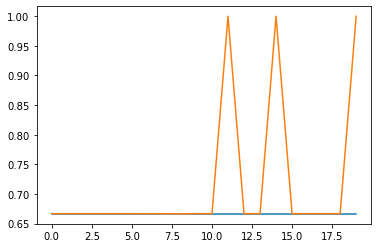

In [3]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 3
input_count = 256
hidden_count = 768
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print()

for _ in range(20):
    r.train_nn(nn, XF, YF, 10, 0.003, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%10 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
        print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        t2 = time.time()
        print(t2 - t1)
        print()

print()
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 160103)
r.release_nn(nn)

558080
[-1.0, -1.0, -0.99972427]

[0] [loss : 0.66666667] [idx: 334] [predict: [1.0, 1.0, 1.0]] [Y: [0, 1, 0]]
81.29725909233093




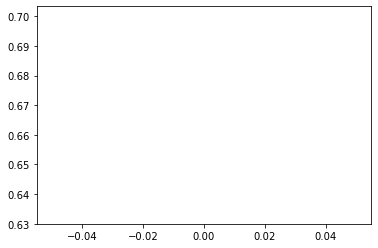

In [3]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 3
input_count = 256
hidden_count = 768
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print()

for _ in range(1):
    r.train_nn(nn, XF, YF, 10, 0.003, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%1 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
        print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        t2 = time.time()
        print(t2 - t1)
        print()

print()
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 160103)
r.release_nn(nn)